In [1]:
import cv2
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import re
import pandas as pd

In [2]:
train_labels=["Trash", "Clean"]
df=pd.read_csv('Val/TrashValidation.csv')
df=df.loc[:,["Filenames","Trash","Clean"]]
df.head()

,Filenames,Trash,Clean
0,Basura1.jpg,1,0
1,Basura2.jpg,1,0
2,Basura3.jpg,1,0
3,Basura4.jpg,1,0
4,Basura5.jpg,1,0


In [16]:
train_datagen = ImageDataGenerator(rescale=1./255.)  # Create one instance for efficiency

# Pre-calculate steps_per_epoch for clarity
steps_per_epoch = int(700 / 16)  # Assuming batch_size remains 16

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,  # Use entire dataframe for training (assuming enough data)
    directory="train",
    x_col="Filenames",
    y_col=train_labels,
    batch_size=16,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(64, 64)
)

# Similar optimizations for validation and test generators
valid_generator = train_datagen.flow_from_dataframe(
    dataframe=df.sample(n=105),  # Sample for validation
    directory="train",
    x_col="Filenames",
    y_col=train_labels,
    batch_size=8,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(64, 64)
)

test_generator = train_datagen.flow_from_dataframe(
    dataframe=df.sample(n=105),  # Sample for testing
    directory="train",
    x_col="Filenames",
    batch_size=16,
    seed=42,
    shuffle=True,
    class_mode=None,
    target_size=(64, 64)
)

Found 700 validated image filenames.
Found 105 validated image filenames.
Found 105 validated image filenames.


In [17]:
#Additional libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import regularizers, optimizers, Sequential

In [18]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))  # Remove input_shape

model.add(Activation('relu'))

In [19]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))


model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))                  
model.add(Flatten())


model.add(Dense(50))                     
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
learning_rate = 0.010
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size 
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size 
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size    
EPOCHS = 2
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=valid_generator,
                    validation_steps=valid_generator.n // valid_generator.batch_size,
                    epochs=EPOCHS
)

Epoch 1/2
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.7167 - loss: 1.1770 - val_accuracy: 0.7692 - val_loss: 0.6413
Epoch 2/2
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.6412 - val_accuracy: 1.0000 - val_loss: 0.6056


C:\Users\ruben\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Text(0.5, 1.0, 'Val_accuracy & Accuracy Diagram')

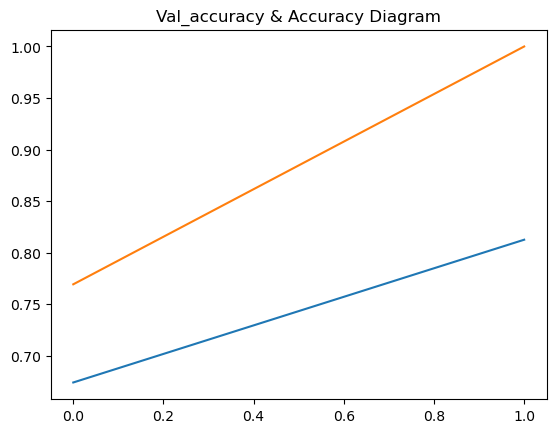

In [29]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Val_accuracy & Accuracy Diagram')

In [30]:
from tensorflow.keras.models import load_model
model = load_model('model2.keras')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


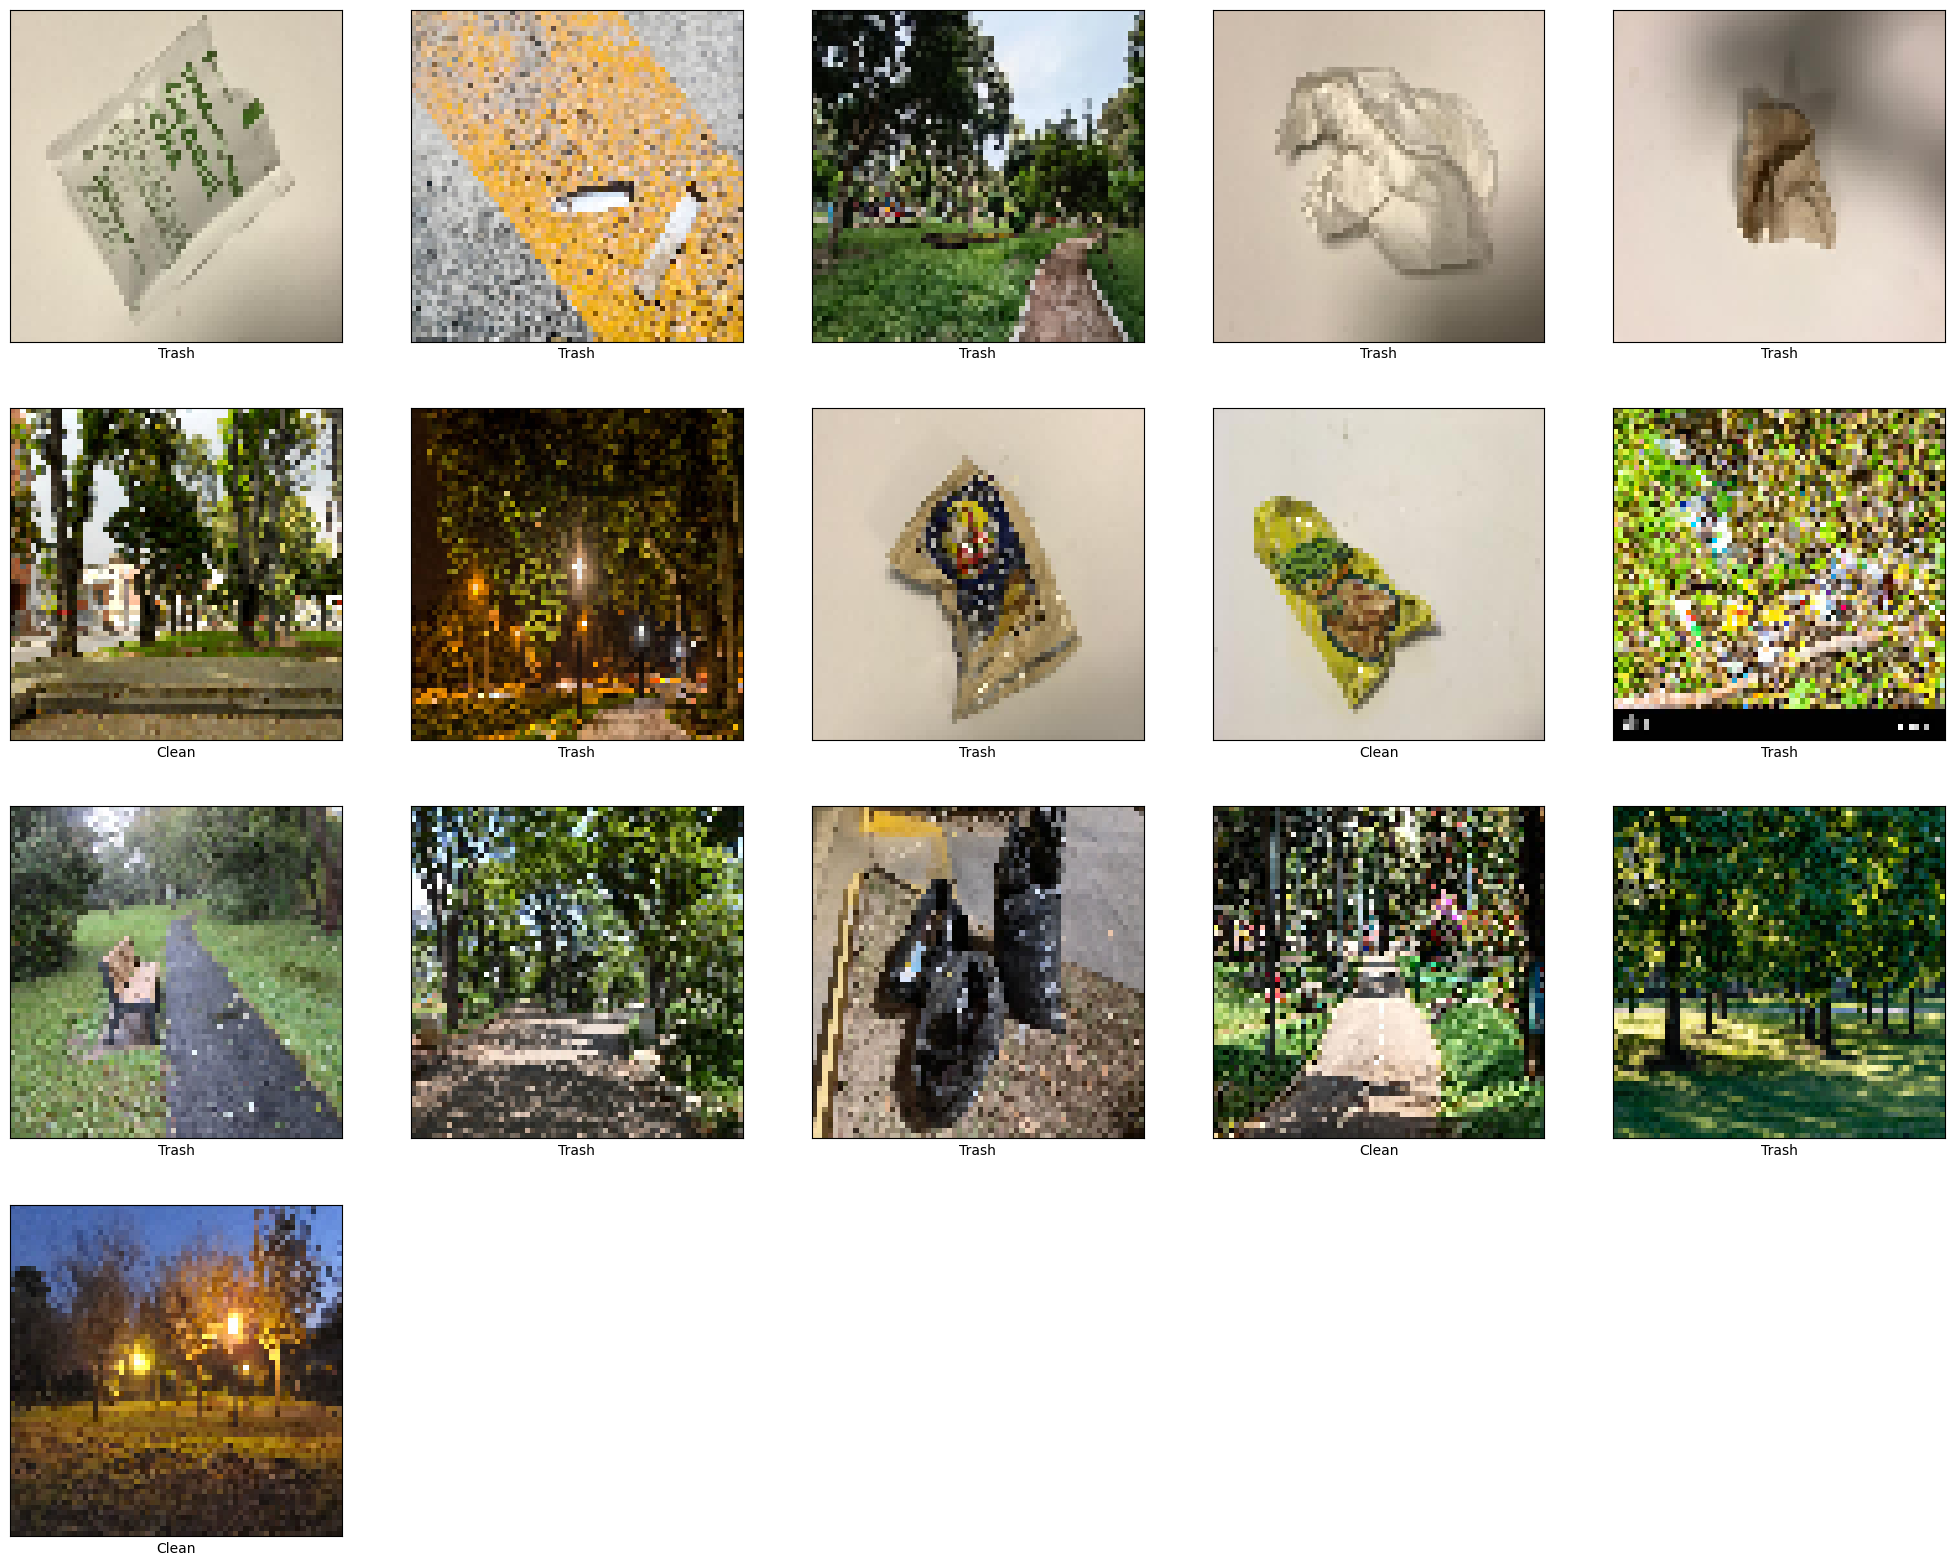

In [31]:
test_generator.reset()
STEP_SIZE_TEST = len(test_generator)
pred = model.predict(test_generator, steps=test_generator.n//test_generator.batch_size, verbose=1)

columns=["Trash","Clean"]
plt.figure(figsize=(25,25))

num_images = min(len(test_generator[0]), 25) # Limita el número de imágenes a mostrar a 25 o la longitud del generador si es menor,
                                             # esto debido a un error del código anterior que no dejaba mostrar más de 6 imágenes
for i in range(num_images):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_generator[0][i])
    plt.xlabel(columns[np.argmax(pred[i])])
plt.show()

In [26]:
pred_bool = (pred >0.5)
predictions = pred_bool.astype(int)
columns=["Trash","Clean"]

results=pd.DataFrame(predictions, columns=columns)
results["Filenames"]=test_generator.filenames[:96]
ordered_cols=["Filenames"]+columns
results=results[ordered_cols]                   
results

,Filenames,Trash,Clean
0,Basura675.jpg,1,0
1,Basura547.jpg,1,0
2,Basura27.jpg,1,0
3,Basura574.jpg,1,0
4,Basura120.jpg,1,0
...,...,...,...
91,Basura594.jpg,1,0
92,Basura603.jpg,1,0
93,Basura303.jpg,1,0
94,Basura40.jpg,1,0


In [14]:
from tensorflow.keras.optimizers import RMSprop 

trained_model = tf.keras.models.load_model('model2.keras', custom_objects={'RMSprop': RMSprop})

In [15]:
print(trained_model)

<Sequential name=sequential_9, built=True>
